### Exploratory data analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from google.colab import files
uploaded = files.upload()

df = pd.read_excel("Retail.xlsx")

Saving Retail.xlsx to Retail (1).xlsx


In [ ]:
# Let's check the shape
print(f"Data Shape: {df.shape}")

# Look at first few records
df.head()


Data Shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Convert InvoiceDate to datetime if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [ ]:
# Remove duplicates
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Dropped {initial_rows - df.shape[0]} duplicate rows.")

# Filter out negative or zero quantity entries
df = df[df['Quantity'] > 0]

# Filter out negative or zero unit prices
df = df[df['UnitPrice'] > 0]

# Remove missing CustomerID if you want to analyze on a per-customer basis
df.dropna(subset=['CustomerID'], inplace=True)

# Create a TotalPrice (Revenue) column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


Dropped 5268 duplicate rows.


In [ ]:
df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
count,392692.0,392692,392692,392692.000000,392692,392692.000000,392692.000000,392692,392692.000000
unique,18532.0,3665,3877,NaN,NaN,NaN,NaN,37,NaN
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN
freq,542.0,2023,2016,NaN,NaN,NaN,NaN,349203,NaN
mean,NaN,NaN,NaN,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,NaN,22.631500
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,NaN,0.001000
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,NaN,4.950000
50%,NaN,NaN,NaN,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,NaN,12.450000
75%,NaN,NaN,NaN,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,NaN,19.800000
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,NaN,168469.600000


In [ ]:
total_revenue = df['TotalPrice'].sum()
print("Total Revenue: £{:,.2f}".format(total_revenue))


Total Revenue: £8,887,208.89


In [ ]:
unique_invoices = df['InvoiceNo'].nunique()
print("Number of Unique Invoices:", unique_invoices)

Number of Unique Invoices: 18532


In [ ]:
unique_customers = df['CustomerID'].nunique()
print("Number of Unique Customers:", unique_customers)
unique_products = df['StockCode'].nunique()
print("Number of Unique Products:", unique_products)

Number of Unique Customers: 4338
Number of Unique Products: 3665


In [ ]:
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
country_revenue.head(10)

,TotalPrice
Country,
United Kingdom,7285024.644
Netherlands,285446.340
EIRE,265262.460
Germany,228678.400
France,208934.310
Australia,138453.810
Spain,61558.560
Switzerland,56443.950
Belgium,41196.340


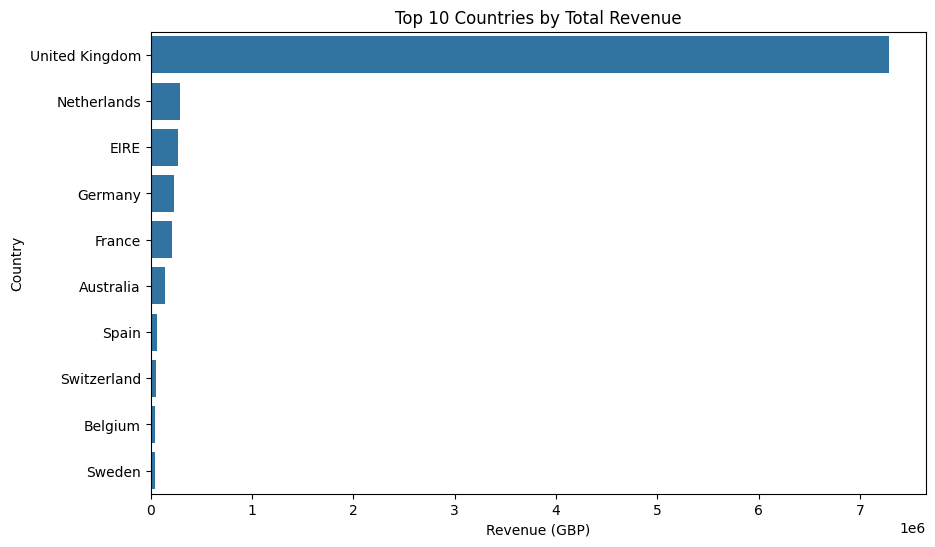

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=country_revenue.head(10).values, y=country_revenue.head(10).index)
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Revenue (GBP)')
plt.ylabel('Country')
plt.show()

In [ ]:
country_invoices = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
country_invoices.head(10)

,InvoiceNo
Country,
United Kingdom,16646
Germany,457
France,389
EIRE,260
Belgium,98
Netherlands,94
Spain,90
Australia,57
Portugal,57


In [ ]:
product_quantity = df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False)
product_quantity.head(10)

,,Quantity
StockCode,Description,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,77916
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
85099B,JUMBO BAG RED RETROSPOT,46078
85123A,WHITE HANGING HEART T-LIGHT HOLDER,36706
84879,ASSORTED COLOUR BIRD ORNAMENT,35263
21212,PACK OF 72 RETROSPOT CAKE CASES,33670
22197,POPCORN HOLDER,30919
23084,RABBIT NIGHT LIGHT,27153


In [ ]:
product_revenue = df.groupby(['StockCode', 'Description'])['TotalPrice'].sum().sort_values(ascending=False)
product_revenue.head(10)

,,TotalPrice
StockCode,Description,
23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60
22423,REGENCY CAKESTAND 3 TIER,142264.75
85123A,WHITE HANGING HEART T-LIGHT HOLDER,100392.10
85099B,JUMBO BAG RED RETROSPOT,85040.54
23166,MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POST,POSTAGE,77803.96
47566,PARTY BUNTING,68785.23
84879,ASSORTED COLOUR BIRD ORNAMENT,56413.03
M,Manual,53419.93


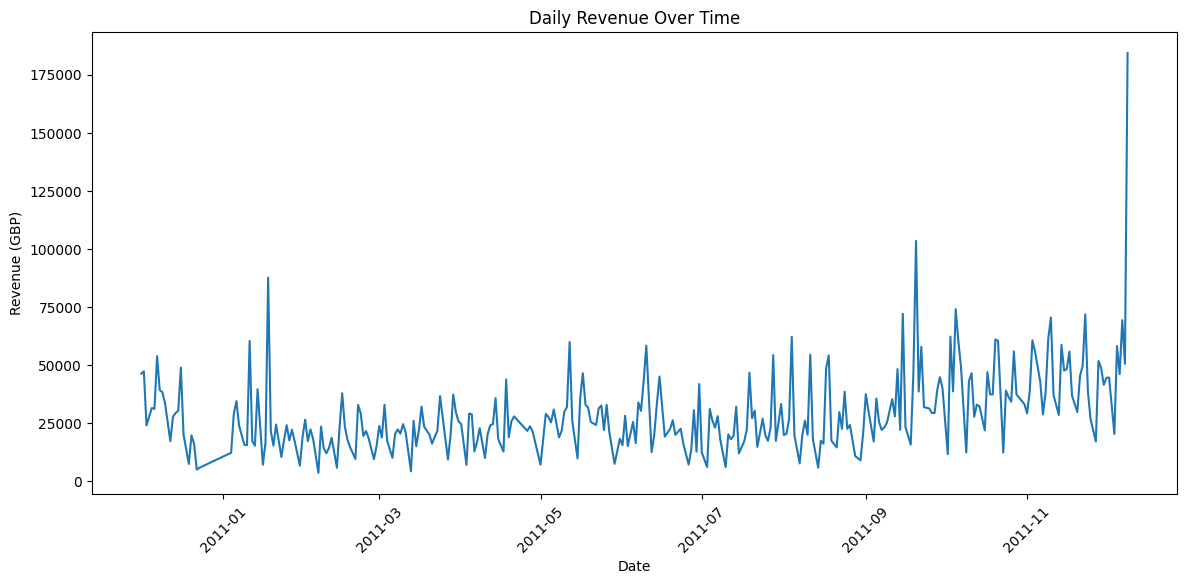

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
daily_revenue = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(daily_revenue['InvoiceDate'], daily_revenue['TotalPrice'])
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (GBP)')
plt.xticks(rotation=45)
plt.show()

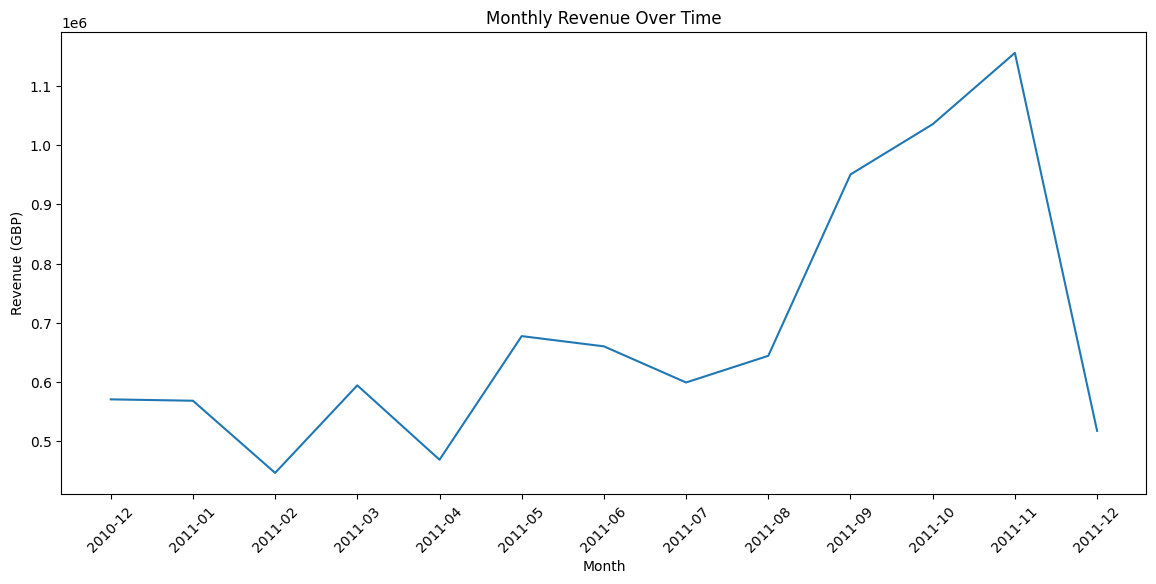

In [ ]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(monthly_revenue['YearMonth'].astype(str), monthly_revenue['TotalPrice'])
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue (GBP)')
plt.xticks(rotation=45)
plt.show()

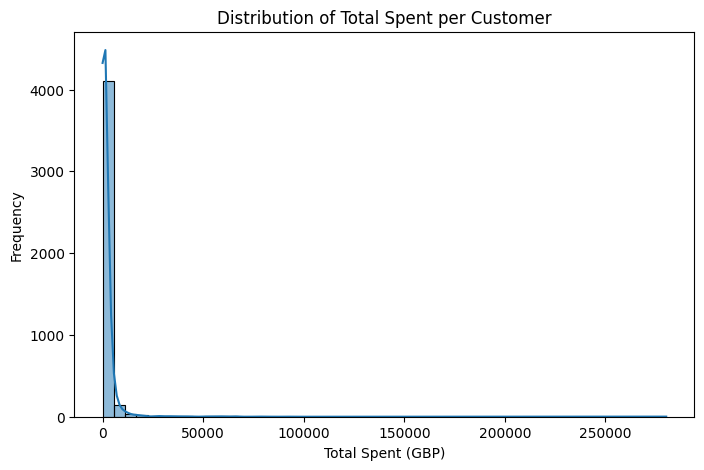

In [ ]:
customer_revenue = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_revenue.columns = ['CustomerID', 'TotalSpent']

plt.figure(figsize=(8,5))
sns.histplot(customer_revenue['TotalSpent'], bins=50, kde=True)
plt.title('Distribution of Total Spent per Customer')
plt.xlabel('Total Spent (GBP)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Let's pick a reference date as the day after the last invoice date
import datetime as dt

max_date = df['InvoiceDate'].max()
reference_date = max_date + pd.Timedelta(days=1)

# Let's compute R, F, M for each customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


### ANOVA

In [ ]:
!pip install seaborn matplotlib scipy statsmodels --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

%matplotlib inline

In [ ]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove returns/cancellations (Quantity <= 0 or UnitPrice <= 0)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

# Drop rows without CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Create a TotalPrice (Revenue) column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [ ]:
# Group by InvoiceNo and Country to get total invoice amount
df_invoice = (
    df.groupby(['InvoiceNo', 'Country'], as_index=False)
      .agg({'TotalPrice': 'sum'})
)

df_invoice.head()

,InvoiceNo,Country,TotalPrice
0,536365,United Kingdom,139.12
1,536366,United Kingdom,22.20
2,536367,United Kingdom,278.73
3,536368,United Kingdom,70.05
4,536369,United Kingdom,17.85


In [ ]:
top_countries = (
    df_invoice.groupby('Country')['InvoiceNo']
    .count()
    .sort_values(ascending=False)
    .head(5)
    .index
)

top_countries

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Belgium'], dtype='object', name='Country')

In [ ]:
df_anova = df_invoice[df_invoice['Country'].isin(top_countries)].copy()
df_anova.shape


(17850, 3)

In [ ]:
# Create a list of arrays, each containing invoice totals for a country
grouped_data = [
    df_anova[df_anova['Country'] == country]['TotalPrice'].values
    for country in top_countries
]

In [ ]:
for country, arr in zip(top_countries, grouped_data):
    print(f"{country}: {len(arr)} invoices")


United Kingdom: 16646 invoices
Germany: 457 invoices
France: 389 invoices
EIRE: 260 invoices
Belgium: 98 invoices


In [ ]:
f_statistic, p_value = f_oneway(*grouped_data)
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.6f}")

F-statistic: 8.6376
P-value: 0.000001


In [ ]:
!pip install statsmodels --quiet
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a flattened array of all invoice totals plus a matching list of group labels
invoice_values = df_anova['TotalPrice'].values
country_labels = df_anova['Country'].values

tukey = pairwise_tukeyhsd(endog=invoice_values, groups=country_labels, alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1     group2      meandiff p-adj    lower     upper   reject
------------------------------------------------------------------
Belgium           EIRE  599.8694 0.0159    74.257 1125.4818   True
Belgium         France  116.7354 0.9693 -384.4523  617.9231  False
Belgium        Germany   80.0196 0.9921 -413.6077  573.6468  False
Belgium United Kingdom   17.2733    1.0 -431.9739  466.5206  False
   EIRE         France  -483.134 0.0019 -838.3436 -127.9245   True
   EIRE        Germany -519.8499 0.0004 -864.3097   -175.39   True
   EIRE United Kingdom -582.5961    0.0 -859.7382 -305.4539   True
 France        Germany  -36.7158 0.9975 -342.6134  269.1818  False
 France United Kingdom   -99.462 0.7555 -326.9011   127.977  False
Germany United Kingdom  -62.7462 0.9264 -273.0015  147.5091  False
------------------------------------------------------------------


In [ ]:
from scipy.stats import levene

lev_stat, lev_p = levene(*grouped_data)
print("Levene’s Test p-value:", lev_p)

Levene’s Test p-value: 0.0034622839660257373


### Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

file_path = 'Retail.xlsx'
df = pd.read_excel(file_path)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.drop_duplicates(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df.dropna(subset=['CustomerID'], inplace=True)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

invoice_df = (
    df.groupby(['InvoiceNo', 'Country', 'InvoiceDate'], as_index=False)
      .agg({
          'Quantity': 'sum',
          'StockCode': 'nunique',
          'UnitPrice': 'mean',
          'TotalPrice': 'sum'
      })
)

invoice_df.rename(columns={
    'Quantity': 'total_quantity',
    'StockCode': 'distinct_items',
    'UnitPrice': 'avg_unit_price',
    'TotalPrice': 'invoice_total'
}, inplace=True)

invoice_df['Month'] = invoice_df['InvoiceDate'].dt.month
invoice_df['Year'] = invoice_df['InvoiceDate'].dt.year

# One-hot encode Country
from sklearn.preprocessing import OneHotEncoder

# Remove the sparse=False argument
ohe = OneHotEncoder(handle_unknown='ignore')

# Fit_transform your column, then convert to dense array
encoded_country = ohe.fit_transform(invoice_df[['Country']]).toarray()

# Create a DataFrame from the dense array
country_cols = ohe.get_feature_names_out(['Country'])
encoded_country_df = pd.DataFrame(encoded_country, columns=country_cols)

# Concatenate back to your main DataFrame
invoice_df = pd.concat([invoice_df.reset_index(drop=True), encoded_country_df], axis=1)
invoice_df.drop(columns=['Country'], inplace=True)


country_features = [col for col in invoice_df.columns if col.startswith('Country_')]
features = ['total_quantity', 'distinct_items', 'avg_unit_price', 'Month', 'Year'] + country_features
X = invoice_df[features].copy()
y = invoice_df['invoice_total'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:,.2f}")
print(f"Test RMSE: {rmse:,.2f}")
print(f"Test R^2: {r2:.4f}")

coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients

Test MSE: 1,741,225.37
Test RMSE: 1,319.55
Test R^2: 0.4320


,Feature,Coefficient
25,Country_Lebanon,9.887650e+02
34,Country_Singapore,6.835649e+02
9,Country_Brazil,4.809494e+02
32,Country_RSA,3.632793e+02
14,Country_Denmark,2.434237e+02
27,Country_Malta,1.719437e+02
11,Country_Channel Islands,1.174994e+02
12,Country_Cyprus,1.013174e+02
16,Country_European Community,8.338257e+01
35,Country_Spain,7.673664e+01


### SHAP

RF MSE: 758312.6635416469
RF R^2: 0.7526457504370743


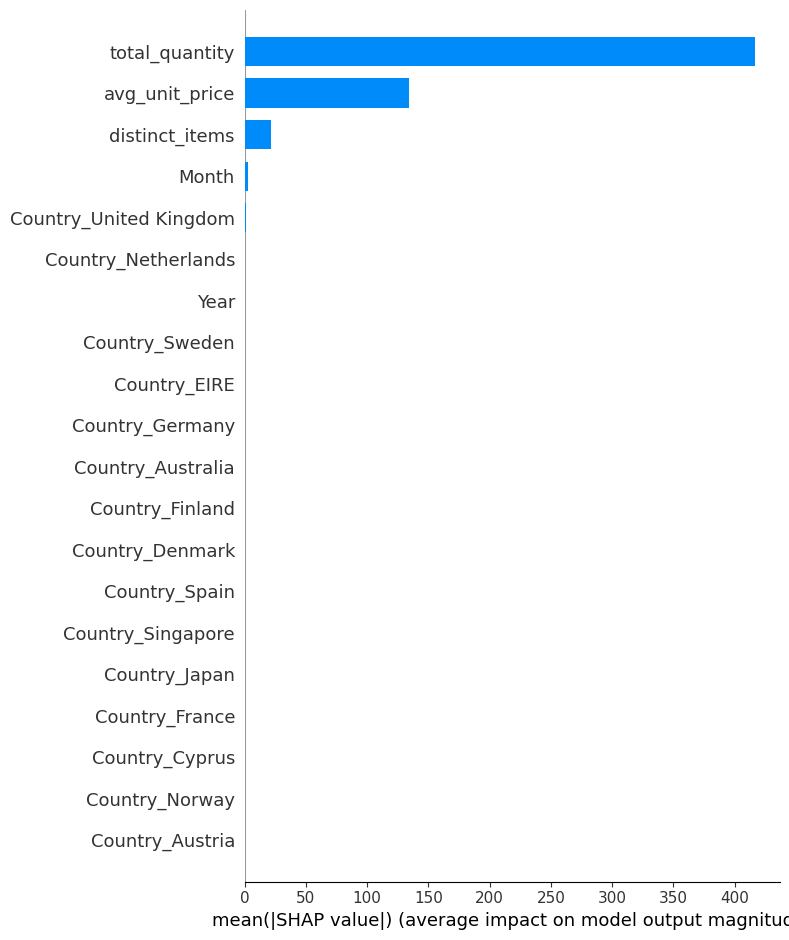

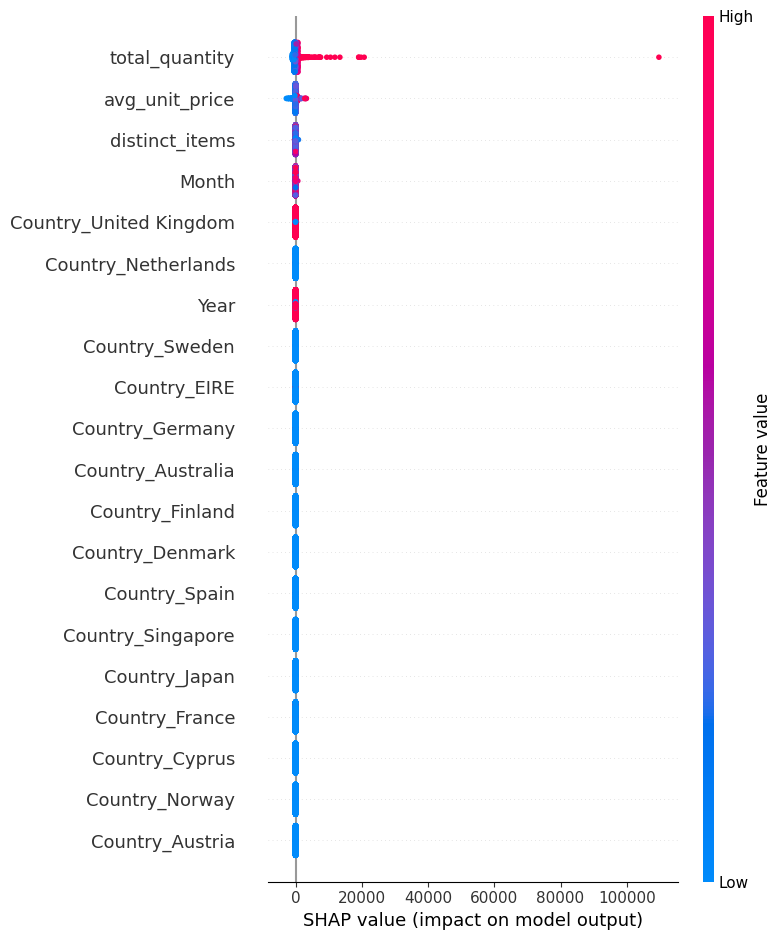

Linear MSE: 1741225.3712842711
Linear R^2: 0.43202914082642996


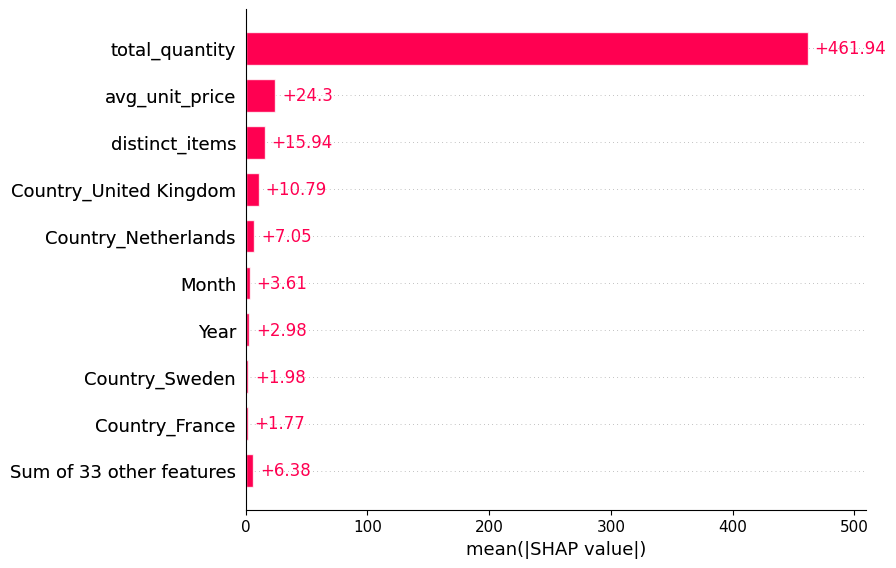

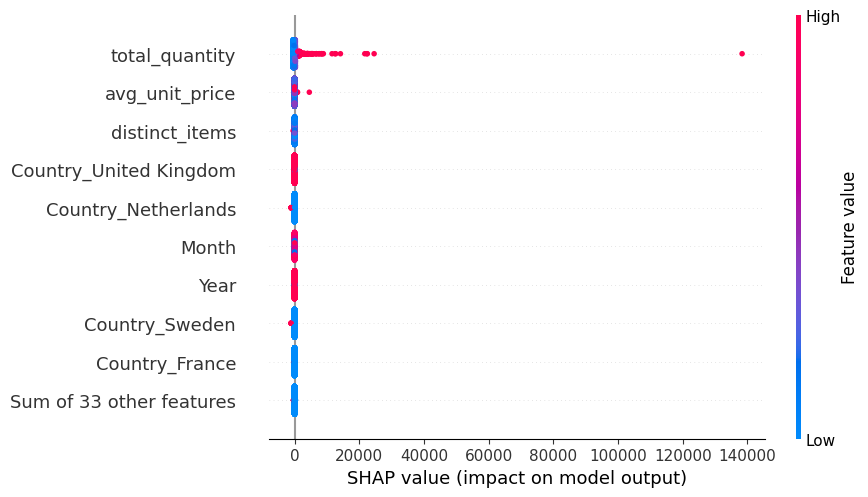

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import shap

%matplotlib inline

df = pd.read_excel('Retail.xlsx')
df.drop_duplicates(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df.dropna(subset=['CustomerID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

invoice_df = (
    df.groupby(['InvoiceNo', 'Country', 'InvoiceDate'], as_index=False)
      .agg({
          'Quantity': 'sum',
          'StockCode': 'nunique',
          'UnitPrice': 'mean',
          'TotalPrice': 'sum'
      })
)

invoice_df.rename(columns={
    'Quantity': 'total_quantity',
    'StockCode': 'distinct_items',
    'UnitPrice': 'avg_unit_price',
    'TotalPrice': 'invoice_total'
}, inplace=True)

invoice_df['Month'] = invoice_df['InvoiceDate'].dt.month
invoice_df['Year'] = invoice_df['InvoiceDate'].dt.year

ohe = OneHotEncoder(handle_unknown='ignore')
encoded_country = ohe.fit_transform(invoice_df[['Country']]).toarray()
country_cols = ohe.get_feature_names_out(['Country'])
encoded_country_df = pd.DataFrame(encoded_country, columns=country_cols)

invoice_df = pd.concat([invoice_df.reset_index(drop=True), encoded_country_df], axis=1)
invoice_df.drop(columns=['Country'], inplace=True)

country_features = [c for c in invoice_df.columns if c.startswith('Country_')]
features = ['total_quantity', 'distinct_items', 'avg_unit_price', 'Month', 'Year'] + country_features

X = invoice_df[features]
y = invoice_df['invoice_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("RF MSE:", mean_squared_error(y_test, y_pred_rf))
print("RF R^2:", r2_score(y_test, y_pred_rf))

explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

# Summary plot (bar = global feature importance)
shap.summary_plot(shap_values_rf, X_test, plot_type='bar')

# Beeswarm plot (detailed distribution of impacts)
shap.summary_plot(shap_values_rf, X_test)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)
print("Linear MSE:", mean_squared_error(y_test, y_pred_lin))
print("Linear R^2:", r2_score(y_test, y_pred_lin))

# Use generic Explainer or KernelExplainer
explainer_lin = shap.Explainer(lin_model, X_train)
shap_values_lin = explainer_lin(X_test)

# Bar plot
shap.plots.bar(shap_values_lin, max_display=10)

# Beeswarm
shap.plots.beeswarm(shap_values_lin)
